In [1]:
# hide ssl warnings for this example.
import requests
requests.packages.urllib3.disable_warnings()

# Uploading container data with python-fmrest

This is a short example on how to upload container data with python-fmrest.

## Import, create server and login

In [2]:
import fmrest

fms = fmrest.Server('https://10.211.55.15',
                    user='admin',
                    password='admin',
                    database='Contacts',
                    layout='Demo',
                    verify_ssl=False
                   )
fms.login()

'e8db15211487b586284fcedbb824032146ca7f89e1bb388b11ce'

## Upload a document for record 1

In [3]:
record_id = 1

We open a file in binary mode from the current directory and pass it to the upload_container() method.

In [4]:
with open('dog-meme.jpg', 'rb') as funny_picture:
    result = fms.upload_container(record_id, 'portrait', funny_picture)
result

True

## Retrieve the uploaded document again

In [5]:
record = fms.get_record(1)
record.portrait

'https://10.211.55.15/Streaming_SSL/MainDB/6489FB1FB30DDD71A6AE647743C434F7377A34B77154391567A82A691BA5DF2A.jpg?RCType=EmbeddedRCFileProcessor'

In [6]:
name, type_, length, response = fms.fetch_file(record.portrait)
name, type_, length

('6489FB1FB30DDD71A6AE647743C434F7377A34B77154391567A82A691BA5DF2A.jpg',
 'image/jpeg',
 '48877')

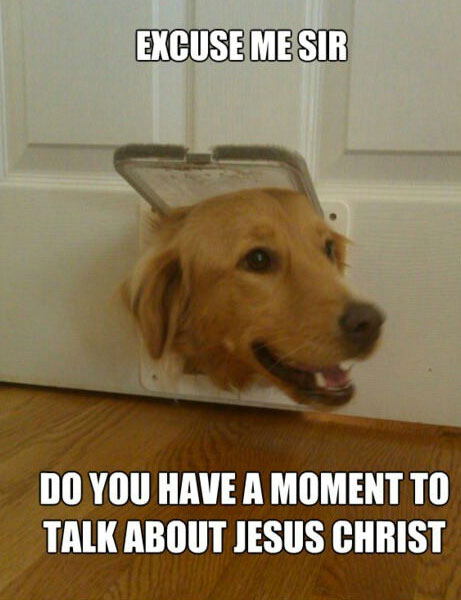

In [7]:
from IPython.display import Image
Image(response.content) 